In [2]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

%load_ext autoreload
%autoreload 2

# Matplotlib settings

In [3]:
%matplotlib inline
mpl.pyplot.style.use('default')
mpl.pyplot.close('all')

mpl.pyplot.style.use('tableau-colorblind10')
%config InlineBackend.figure_format = 'retina'

mpl.rcParams['xtick.labelsize'] = 16 
mpl.rcParams['ytick.labelsize'] = 16 

plt.rcParams['figure.dpi'] = 85
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['lines.linewidth'] = 5
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['axes.linewidth'] = 2.5
plt.rcParams['xtick.major.size'] = 7
plt.rcParams['xtick.minor.size'] = 4
plt.rcParams['ytick.major.size'] = 4.32
plt.rcParams['ytick.minor.size'] = 2.46
plt.rcParams['xtick.major.width'] = 1.6
plt.rcParams['xtick.minor.width'] = 1.2
plt.rcParams['ytick.major.width'] = 1.6
plt.rcParams['ytick.minor.width'] = 1.2

# Load data

In [3]:
data_mode = 'emuPk'
n_rlzs_per_cosmo = 1
tag_emuPk = '_2param' # '_2param' or '_5param'
# this means we decided to be conservative in the error estimation and use a 500 Gpc box 
# even though the Pk is computed for a 1000 Gpc box
tag_errG = f'_boxsize500' 
# nlrzs is the number of draws from the noiseless Pk with the given gaussian error; start with 1
tag_datagen = f'{tag_emuPk}{tag_errG}_nrlzs{n_rlzs_per_cosmo}'
tag_data = '_'+data_mode + tag_datagen


In [4]:
def repeat_arr_rlzs(arr, n_rlzs=1):
    arr_repeat = np.tile(arr, (n_rlzs,1))
    return arr_repeat

def load_data_emuPk(tag_emuPk, tag_errG, tag_datagen, 
                    n_rlzs_per_cosmo=1, return_noiseless=False,
                    mask_negPk=True):

    dir_data = '../data/emuPks'
    fn_emuPk = f'{dir_data}/emuPks{tag_emuPk}.npy'
    fn_emuPkerrG = f'{dir_data}/emuPks_errgaussian{tag_emuPk}{tag_errG}.npy'
    fn_emuPk_noisy = f'{dir_data}/emuPks_noisy{tag_datagen}.npy'
    fn_emuPk_params = f'{dir_data}/emuPks_params{tag_emuPk}.txt'
    fn_emuk = f'{dir_data}/emuPks_k{tag_emuPk}.txt'
    fn_bias_vector = f'{dir_data}/bias_params.txt'
    fn_rands = f'{dir_data}/randints{tag_emuPk}.npy'
        
    Pk = np.load(fn_emuPk_noisy, allow_pickle=True)   
    Pk_noiseless = np.load(fn_emuPk, allow_pickle=True)
    k = np.genfromtxt(fn_emuk)
    bias_vector = np.loadtxt(fn_bias_vector)
    random_ints = np.load(fn_rands, allow_pickle=True)

    theta_noiseless = np.genfromtxt(fn_emuPk_params, delimiter=',', names=True)
    param_names = theta_noiseless.dtype.names
    theta_noiseless = np.array([list(tup) for tup in theta_noiseless]) # from tuples to 2d array
    gaussian_error_pk_noiseless = np.load(fn_emuPkerrG, allow_pickle=True)
    
    theta = repeat_arr_rlzs(theta_noiseless, n_rlzs=n_rlzs_per_cosmo)
    gaussian_error_pk = repeat_arr_rlzs(gaussian_error_pk_noiseless, n_rlzs=n_rlzs_per_cosmo)
    
    if mask_negPk:
        mask = np.all(Pk>0, axis=0)
        Pk = Pk[:,mask]
        Pk_noiseless = Pk_noiseless[:,mask]
        gaussian_error_pk = gaussian_error_pk[:,mask]
        gaussian_error_pk_noiseless = gaussian_error_pk_noiseless[:,mask]
        k = k[mask]
    
    if return_noiseless:
        return theta, Pk, gaussian_error_pk, k, param_names, bias_vector, random_ints, \
               theta_noiseless, Pk_noiseless, gaussian_error_pk_noiseless
    
    else:
        return theta, Pk, gaussian_error_pk, k, param_names, bias_vector, random_ints

In [5]:
theta, Pk, gaussian_error_pk, k, param_names, bias_vector, random_ints, \
               theta_noiseless, Pk_noiseless, gaussian_error_pk_noiseless = load_data_emuPk(tag_emuPk, tag_errG, tag_datagen, 
                                                                                            n_rlzs_per_cosmo=1, 
                                                                                            return_noiseless=True)

In [6]:
print(f"N_data: {Pk.shape[0]}")
print(f"N_dim: {Pk.shape[1]}")
print(f"N_params: {theta.shape[1]}")
print(f"Parameters: {param_names}")

N_data: 10000
N_dim: 26
N_params: 2
Parameters: ('omega_cold', 'sigma8_cold')


# Plot a subset of the data

In [7]:
n_plot = 100

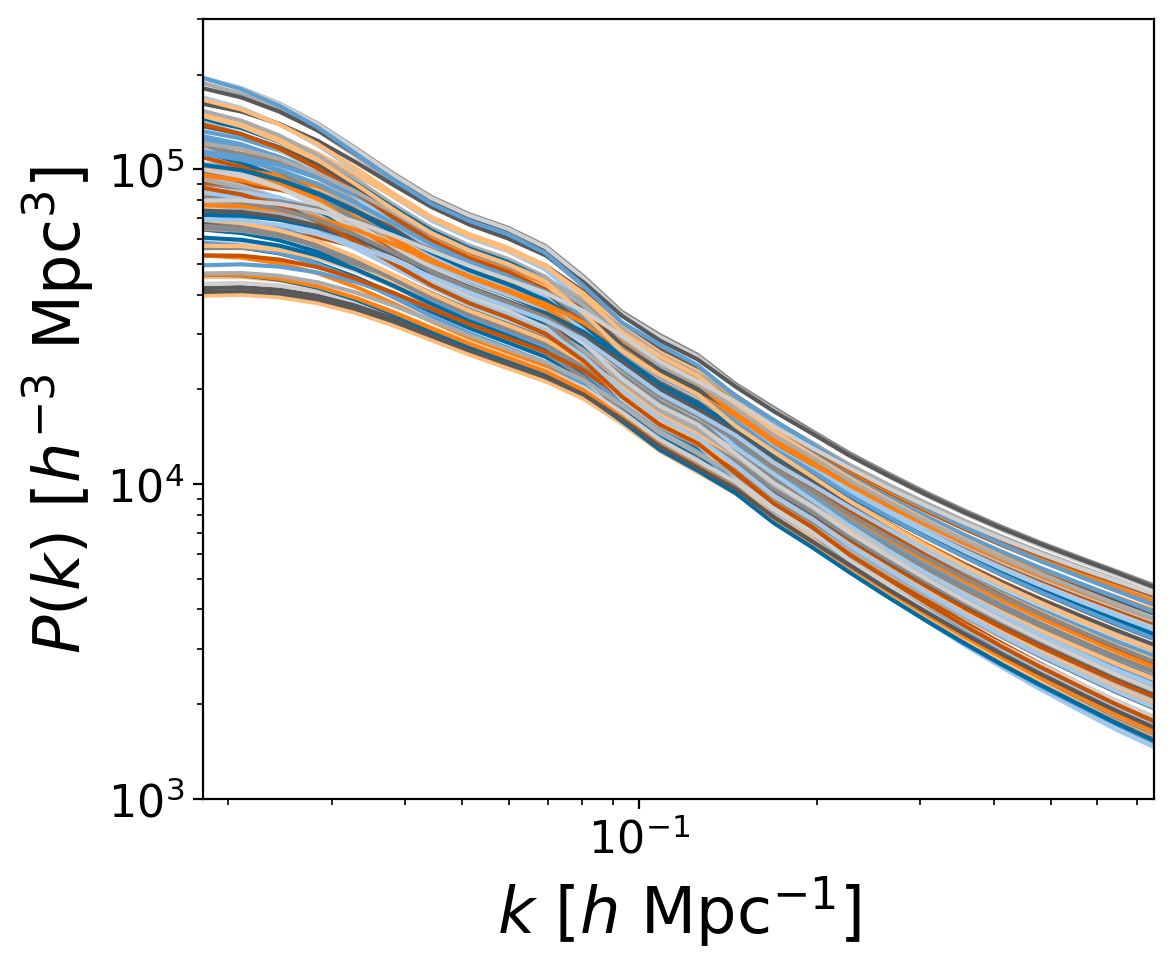

In [8]:
fig, ax = mpl.pyplot.subplots(figsize=(6, 5))
for iLH in range(n_plot):
    ax.loglog(k, Pk_noiseless[iLH])

ax.set_xlabel(r'$k \,\, [h \,\, {\rm Mpc}^{-1}]$', fontsize=23)
ax.set_ylabel(r'$P(k) \,\, [h^{-3} \,\, {\rm Mpc}^3]$', fontsize=23)

ax.set_xlim(np.min(k), np.max(k))
ax.set_ylim(1e3, 3e5)
mpl.pyplot.tight_layout()
mpl.pyplot.show()

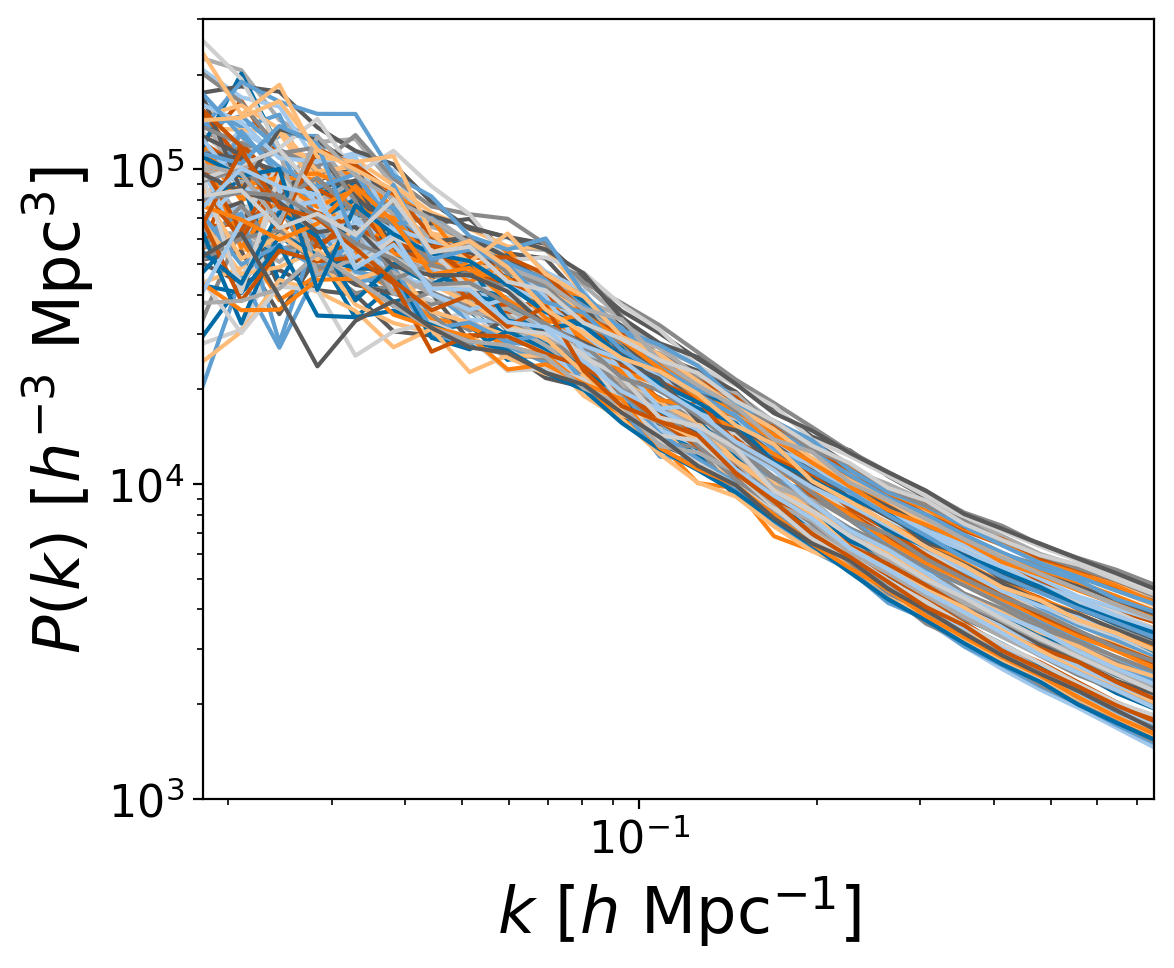

In [9]:
fig, ax = mpl.pyplot.subplots(figsize=(6, 5))
for iLH in range(n_plot):
    ax.loglog(k, Pk[iLH])

ax.set_xlabel(r'$k \,\, [h \,\, {\rm Mpc}^{-1}]$', fontsize=23)
ax.set_ylabel(r'$P(k) \,\, [h^{-3} \,\, {\rm Mpc}^3]$', fontsize=23)

ax.set_xlim(np.min(k), np.max(k))
ax.set_ylim(1e3, 3e5)
mpl.pyplot.tight_layout()
mpl.pyplot.show()

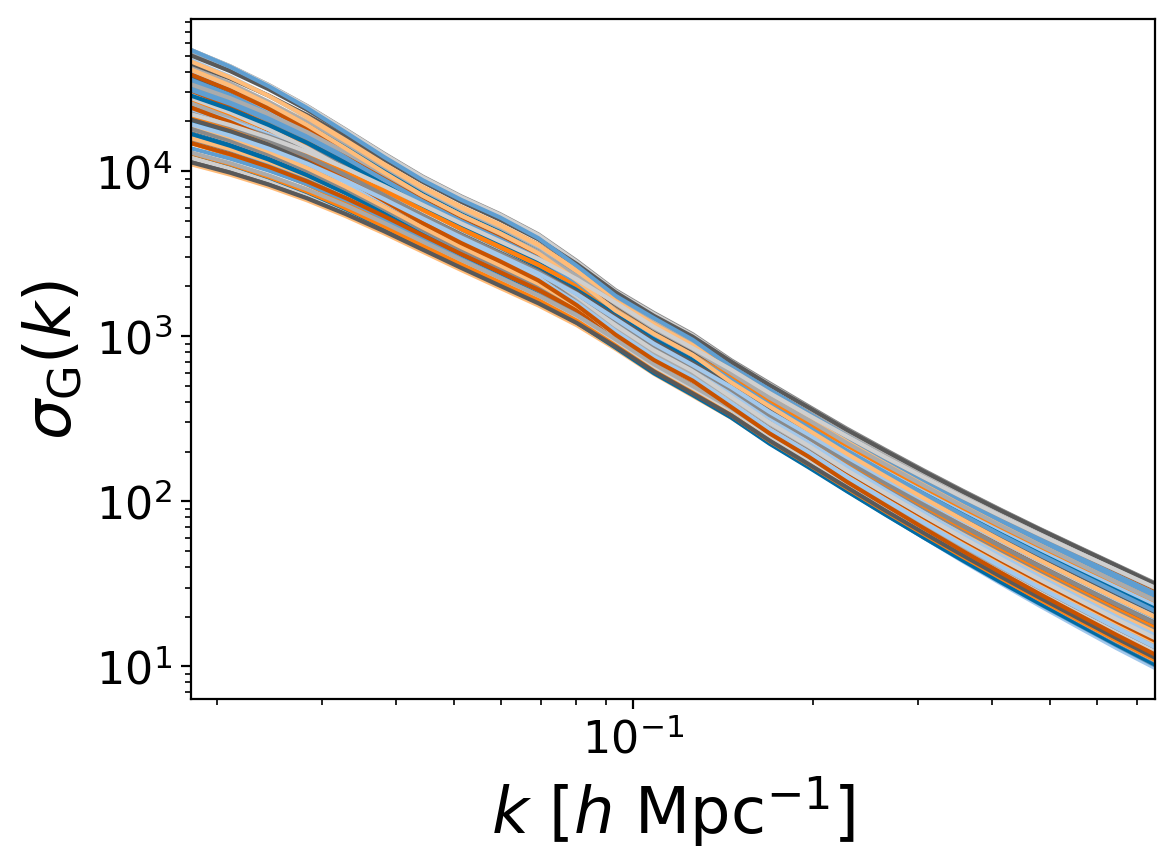

In [10]:
fig, ax = mpl.pyplot.subplots(figsize=(6, 4.5))
for iLH in range(n_plot):
    ax.loglog(k, gaussian_error_pk_noiseless[iLH])

ax.set_xlabel(r'$k \,\, [h \,\, {\rm Mpc}^{-1}]$', fontsize=23)
# ax.set_ylabel(r'$\sigma_\text{G}(k)$', fontsize=23)
ax.set_ylabel(r'$\sigma_{\rm G}(k)$', fontsize=23)

ax.set_xlim(np.min(k), np.max(k))

mpl.pyplot.tight_layout()
mpl.pyplot.show()

# Try to infer theta!
### The goal is: given an input Pk, recover the associated theta (set of cosmological parameters).

In [11]:
import torch

from sbi.analysis import pairplot
from sbi.inference import NPE
from sbi.utils import BoxUniform
from sbi.utils.user_input_checks import (
    check_sbi_inputs,
    process_prior,
    process_simulator,
)

C:\Users\Mahlet Shiferaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


### Infer prior from given theta

In [12]:
print(theta[:,0].min(), theta[:,0].max())
print(theta[:,1].min(), theta[:,1].max())

0.23000521 0.39999832
0.65000518 0.89998792


In [13]:
prior = BoxUniform(low=torch.tensor([0.23, 0.65]), high = torch.tensor([0.4,0.9]))

In [14]:
# Check prior, return PyTorch prior.
prior, num_parameters, prior_returns_numpy = process_prior(prior)

### Separate training and test sets

In [15]:
x_train = torch.tensor(Pk[:9000], dtype = torch.float32)
theta_train = torch.tensor(theta[:9000], dtype = torch.float32)

In [16]:
x_test = torch.tensor(Pk[9000:], dtype = torch.float32)
theta_test = torch.tensor(theta[9000:], dtype = torch.float32)

### Instantiate the inference model using neural posterior estimation

In [17]:
inference = NPE(prior=prior)

In [18]:
inference = inference.append_simulations(theta_train, x_train)

### Train the neural density estimator to build the posterior

In [19]:
density_estimator = inference.train()

 Neural network successfully converged after 158 epochs.

In [20]:
posterior = inference.build_posterior(density_estimator)

print(posterior) # prints how the posterior was trained

Posterior p(θ|x) of type DirectPosterior. It samples the posterior network and rejects samples that
            lie outside of the prior bounds.


### Visualize the inferred posterior for a new observation


Drawing 10000 posterior samples: 10093it [00:00, 79822.74it/s]                          


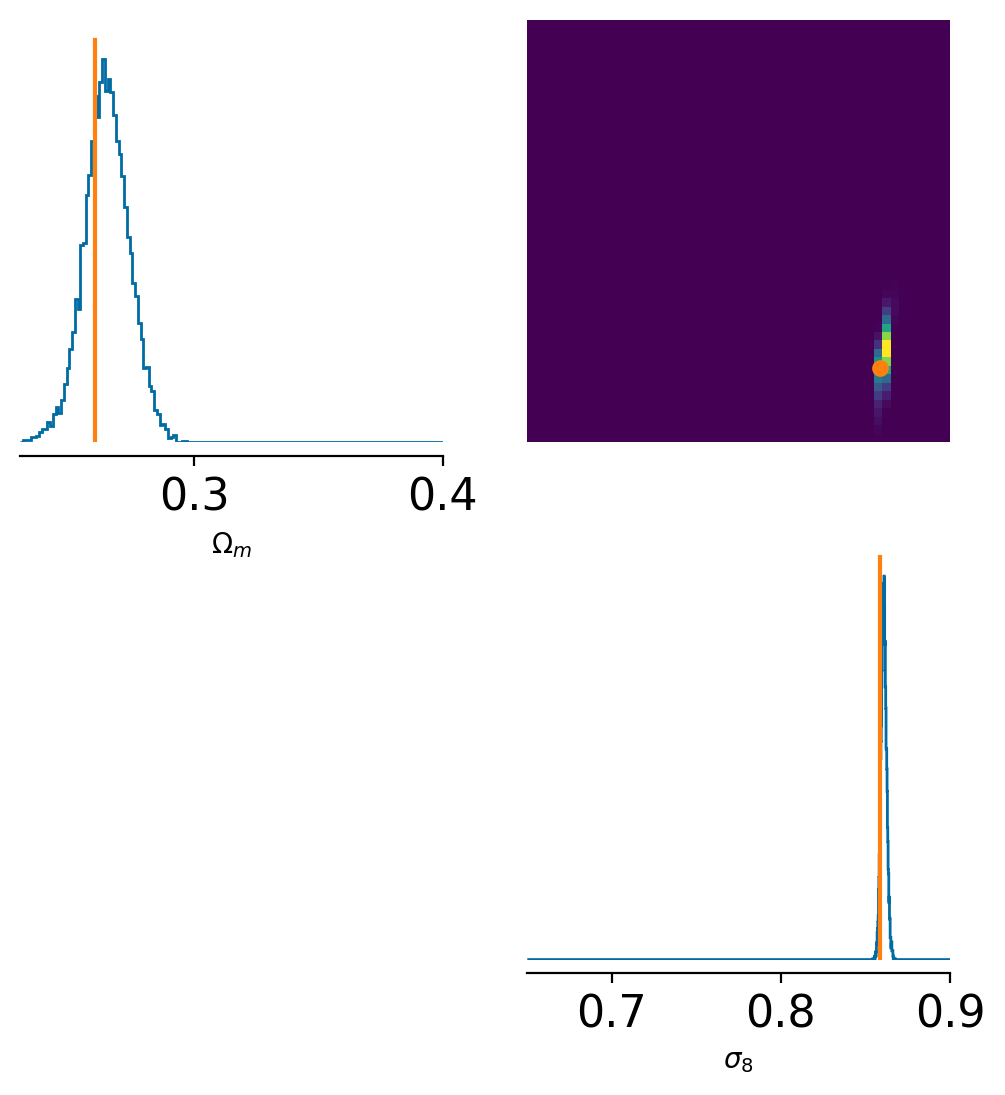

In [21]:
samples = posterior.sample((10000,), x=x_test[0])
_ = pairplot(samples,
             points=torch.tensor([list(np.array(theta_test[0]))]),
             figsize=(6, 6), limits=[[0.23, 0.4], [0.65, 0.9]],
             labels=[r"$\Omega_m$", r"$\sigma_8$"])

Drawing 10000 posterior samples: 10170it [00:00, 126677.00it/s]           


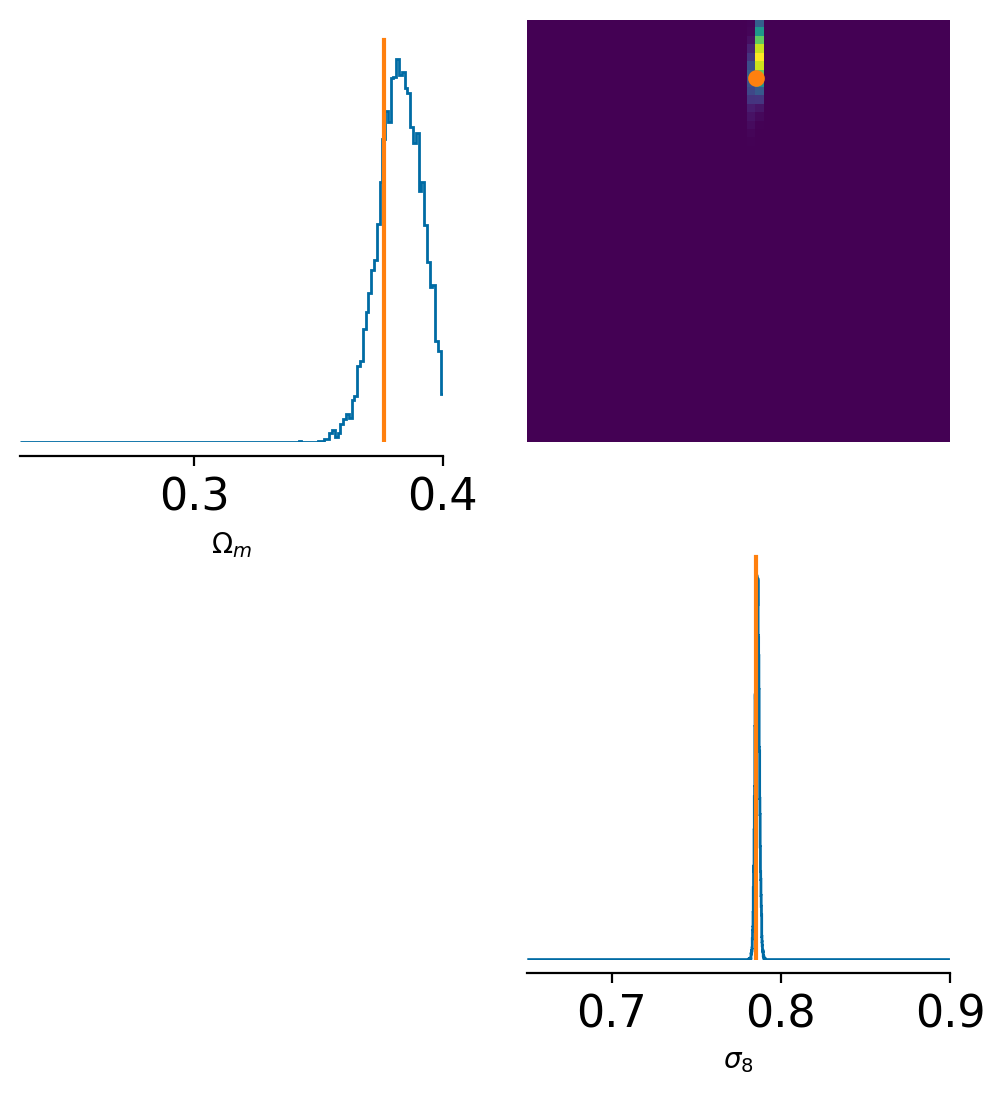

In [22]:
samples = posterior.sample((10000,), x=x_test[1])
_ = pairplot(samples,
             points=torch.tensor([list(np.array(theta_test[1]))]),
             figsize=(6, 6), limits=[[0.23, 0.4], [0.65, 0.9]],
             labels=[r"$\Omega_m$", r"$\sigma_8$"])

### Compare log-probabilities

In [23]:
# first sample an alternative parameter set from the prior
theta_diff = prior.sample((1,))

In [24]:
log_probability_true_theta = posterior.log_prob(theta_test[0], x=x_test[0])
log_probability_diff_theta = posterior.log_prob(theta_diff, x=x_test[0])
log_probability_samples = posterior.log_prob(samples, x=x_test[0])

print( r'high for true theta :', log_probability_true_theta)
print( r'low for different theta :', log_probability_diff_theta)
print( r'range of posterior samples: min:', torch.min(log_probability_samples),' max :', torch.max(log_probability_samples))

high for true theta : tensor([8.4922])
low for different theta : tensor([-746.8730])
range of posterior samples: min: tensor(-701.0877)  max : tensor(-418.4125)


# Make some summary plots
### Start with the mean

In [25]:
samples_batched = posterior.sample_batched((10000,), x=x_test)

Drawing 10000 posterior samples: 10084it [07:03, 23.81it/s]                          


In [26]:
theta_guess = torch.mean(samples_batched, axis = 0)
theta_delta = theta_guess-theta_test

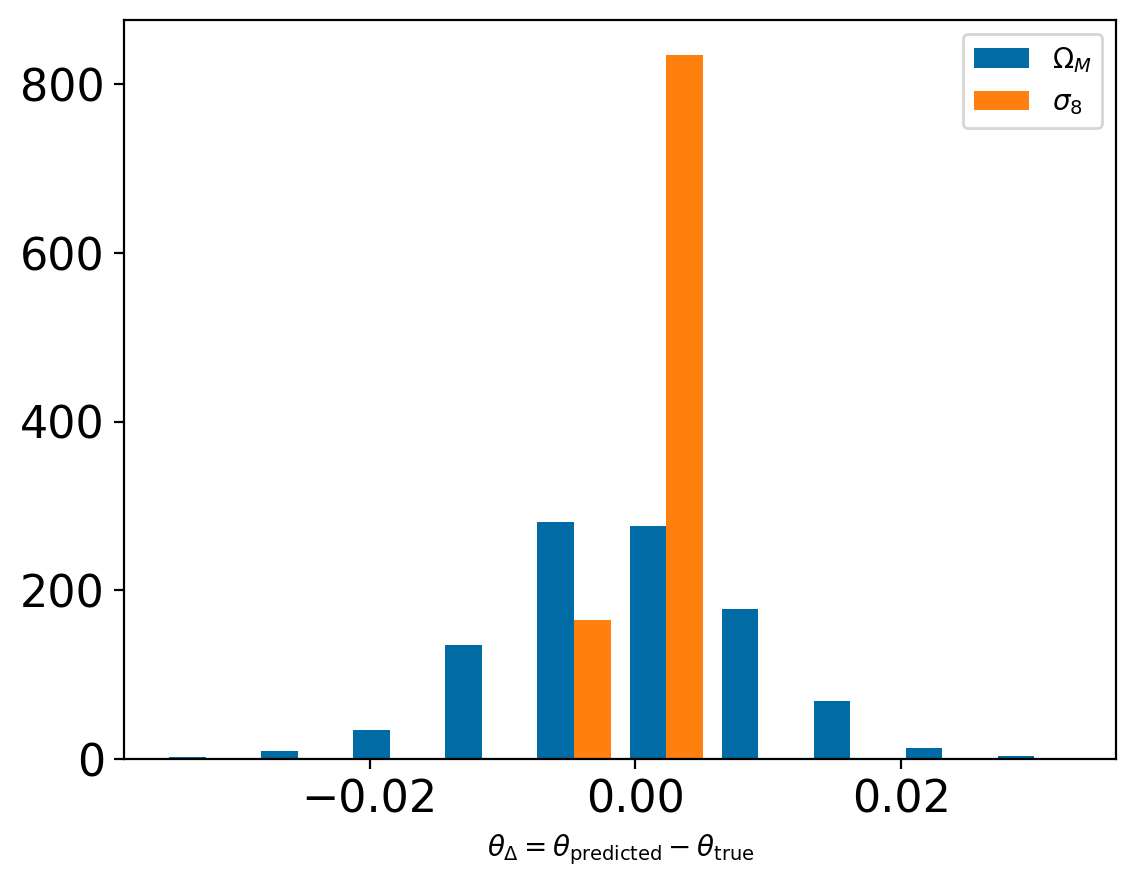

In [27]:
label = [r"$\Omega_M$", r"$\sigma_8$"]

plt.hist(theta_delta.T, label = label)
plt.xlabel(r'$\theta_\Delta=\theta_\mathrm{predicted}-\theta_\mathrm{true}$')
plt.legend()
plt.show()

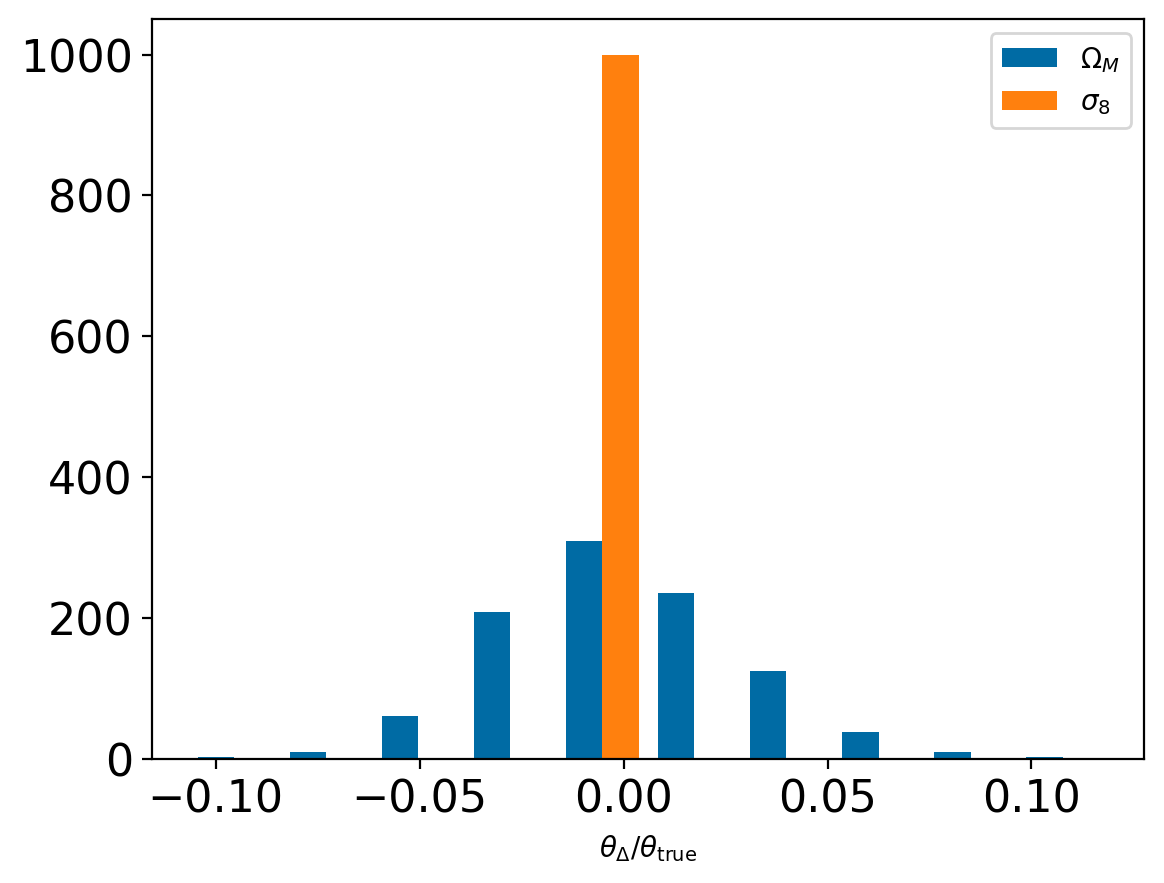

In [28]:
plt.hist(theta_delta.T/theta_test.T, label = label)
plt.xlabel(r'$\theta_\Delta/\theta_\mathrm{true}$')
plt.legend()
plt.show()

### Now see how the standard deviation does

In [29]:
# get the standard deviation
theta_std = torch.std(samples_batched, axis = 0)

In [30]:
from scipy.stats import norm

In [31]:
bins = np.linspace(-4, 4, 10)
normal = norm.rvs(size = len(theta_test))

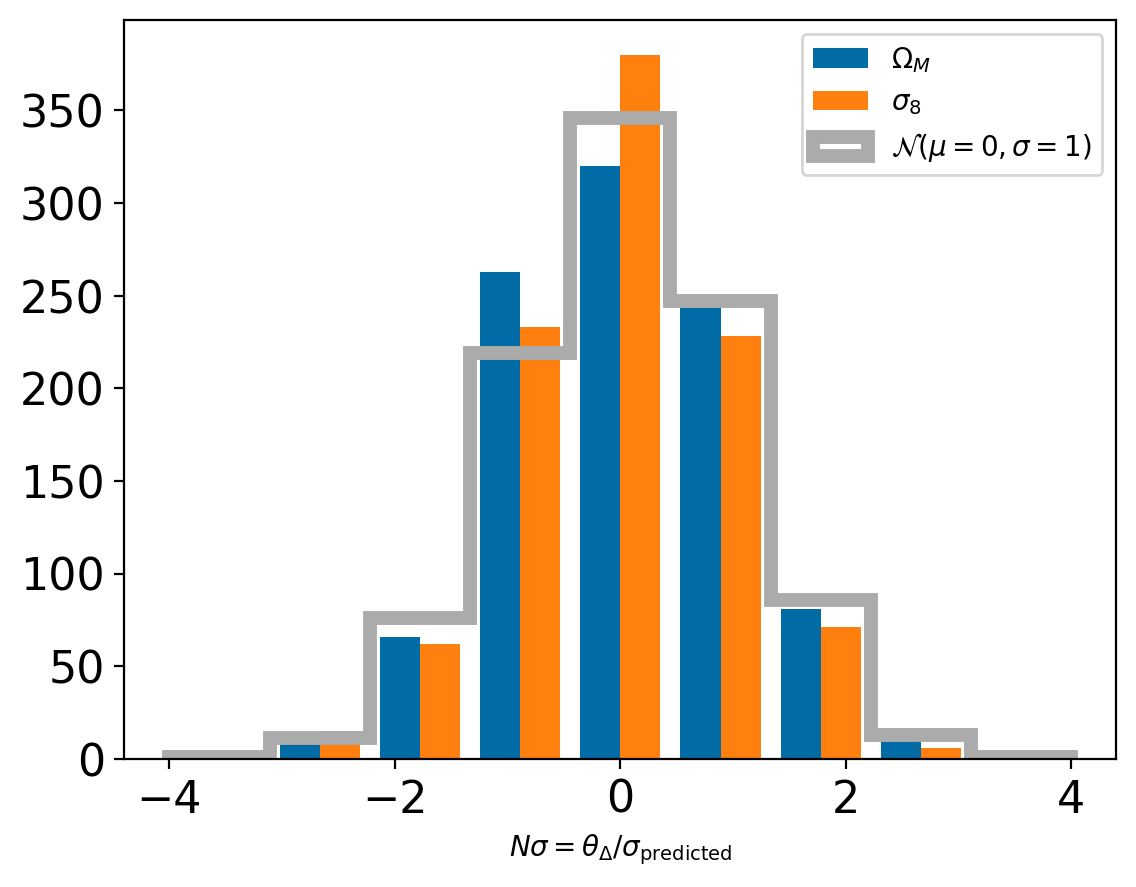

In [32]:
plt.hist(theta_delta.T/theta_std.T, bins = bins, label = [r"$\Omega_M$", r"$\sigma_8$"], histtype = 'bar')
plt.hist(normal, bins = bins, label = '$\mathcal{N}(\mu=0, \sigma=1)$', linewidth = 5, histtype = 'step')
plt.xlabel(r'$N\sigma = \theta_\Delta/\sigma_\mathrm{predicted}$')
plt.legend()
plt.show()

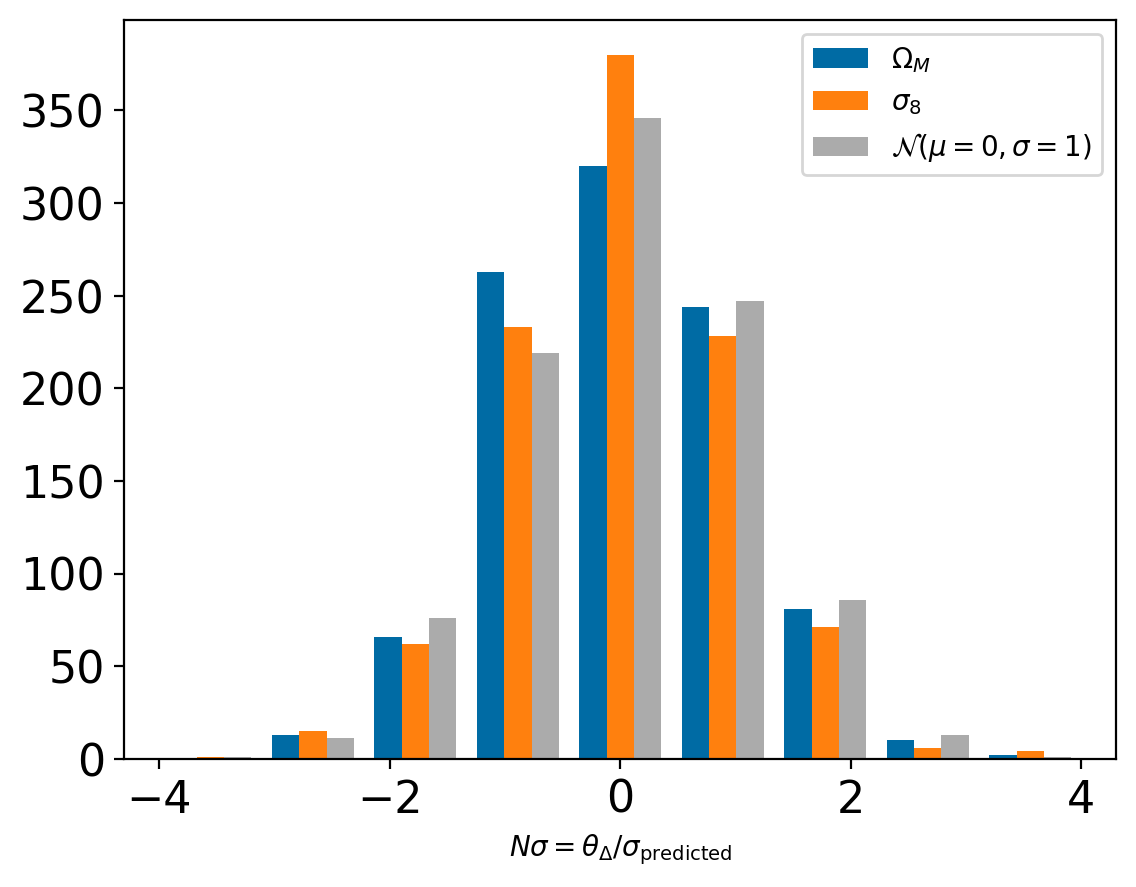

In [33]:
plt.hist([(theta_delta.T/theta_std.T)[0], (theta_delta.T/theta_std.T)[1], normal], bins = bins, label = [r"$\Omega_M$", r"$\sigma_8$", '$\mathcal{N}(\mu=0, \sigma=1)$'])
plt.xlabel(r'$N\sigma = \theta_\Delta/\sigma_\mathrm{predicted}$')
plt.legend()
plt.show()

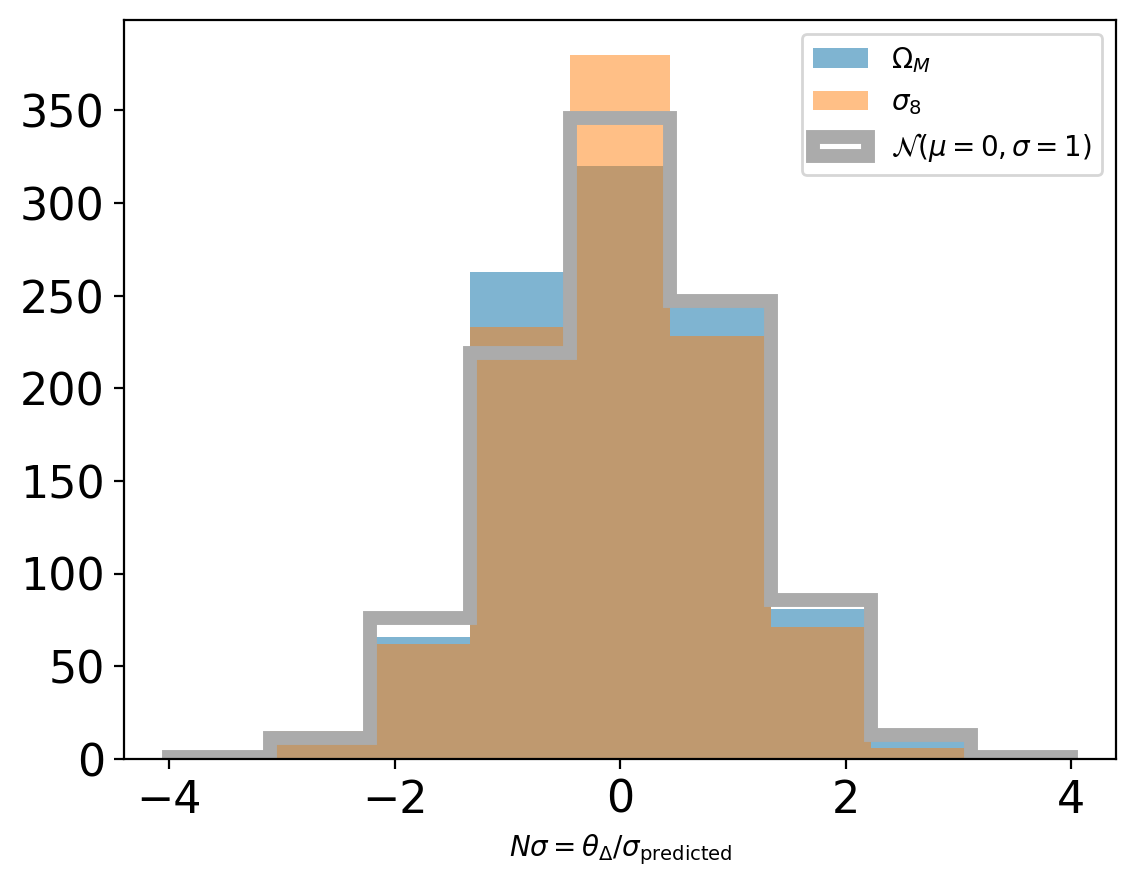

In [34]:
plt.hist((theta_delta.T/theta_std.T)[0], bins = bins, label = r"$\Omega_M$", alpha = 0.5)
plt.hist((theta_delta.T/theta_std.T)[1], bins = bins, label = r"$\sigma_8$", alpha = 0.5)
plt.hist(normal, bins = bins, label = '$\mathcal{N}(\mu=0, \sigma=1)$', linewidth = 5, histtype = 'step')
plt.xlabel(r'$N\sigma = \theta_\Delta/\sigma_\mathrm{predicted}$')
plt.legend()
plt.show()

### Plot separately

In [46]:
import matplotlib.gridspec as gridspec

In [71]:
label = [r"$\Omega_M$", r"$\sigma_8$"]

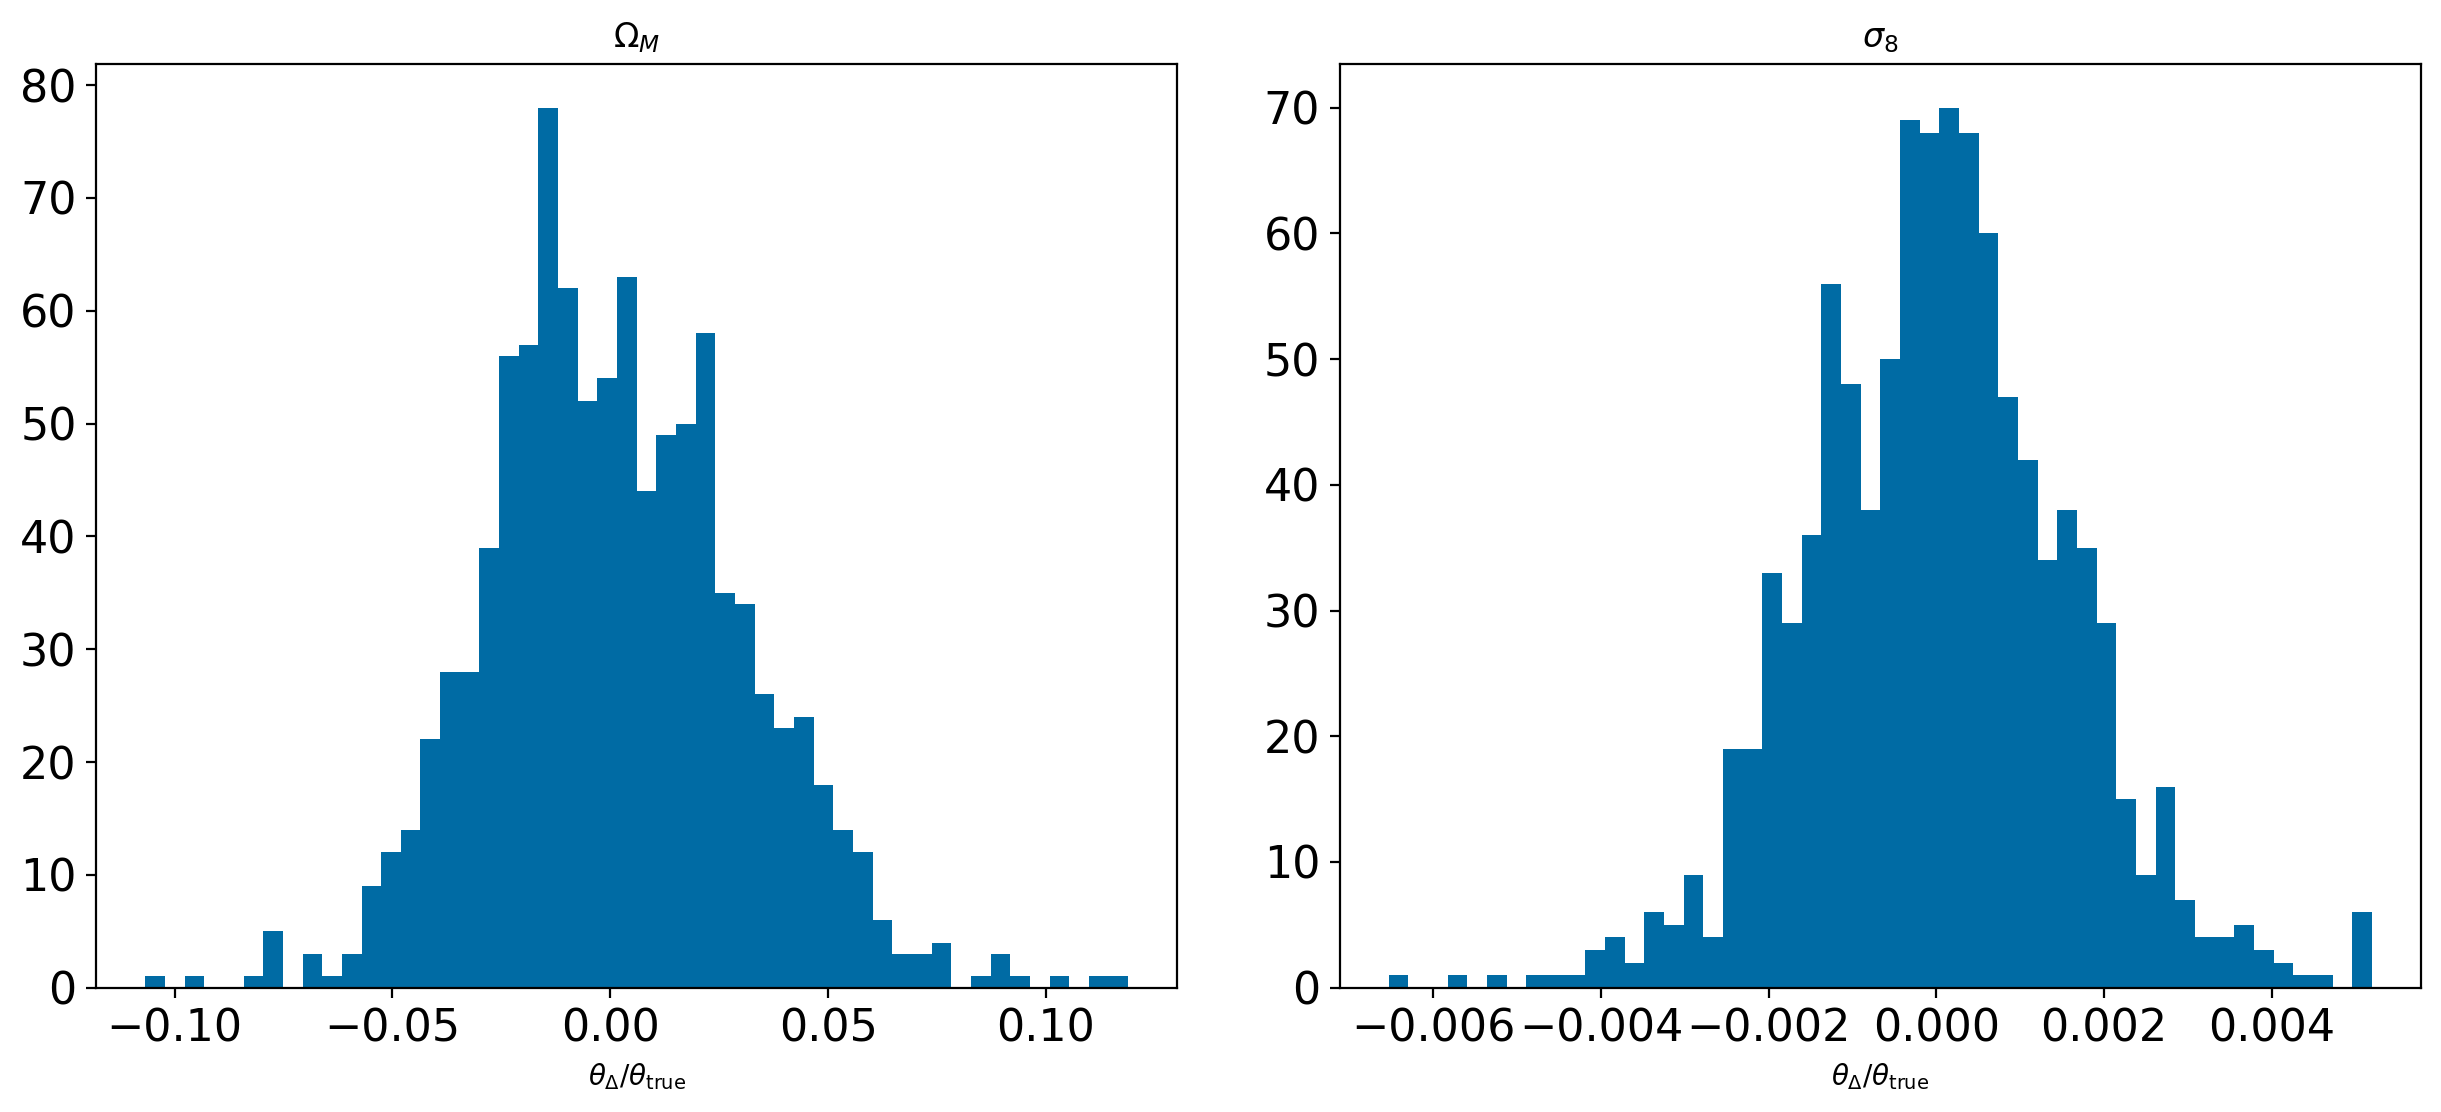

In [72]:
plt.figure(figsize = (15,6))
grid = gridspec.GridSpec(1,2)
grid.update(wspace = 0.15)
for i in range(len(theta_delta.T)):
    grid0 = plt.subplot(grid[i])
    grid0.hist(theta_delta.T[i]/theta_test.T[i], bins = 50)
    grid0.set_title(label = label[i])
    grid0.set_xlabel(r'$\theta_\Delta/\theta_\mathrm{true}$')
plt.show()

In [64]:
bins = np.linspace(-4, 4, 50)
normal = norm.pdf(bins)

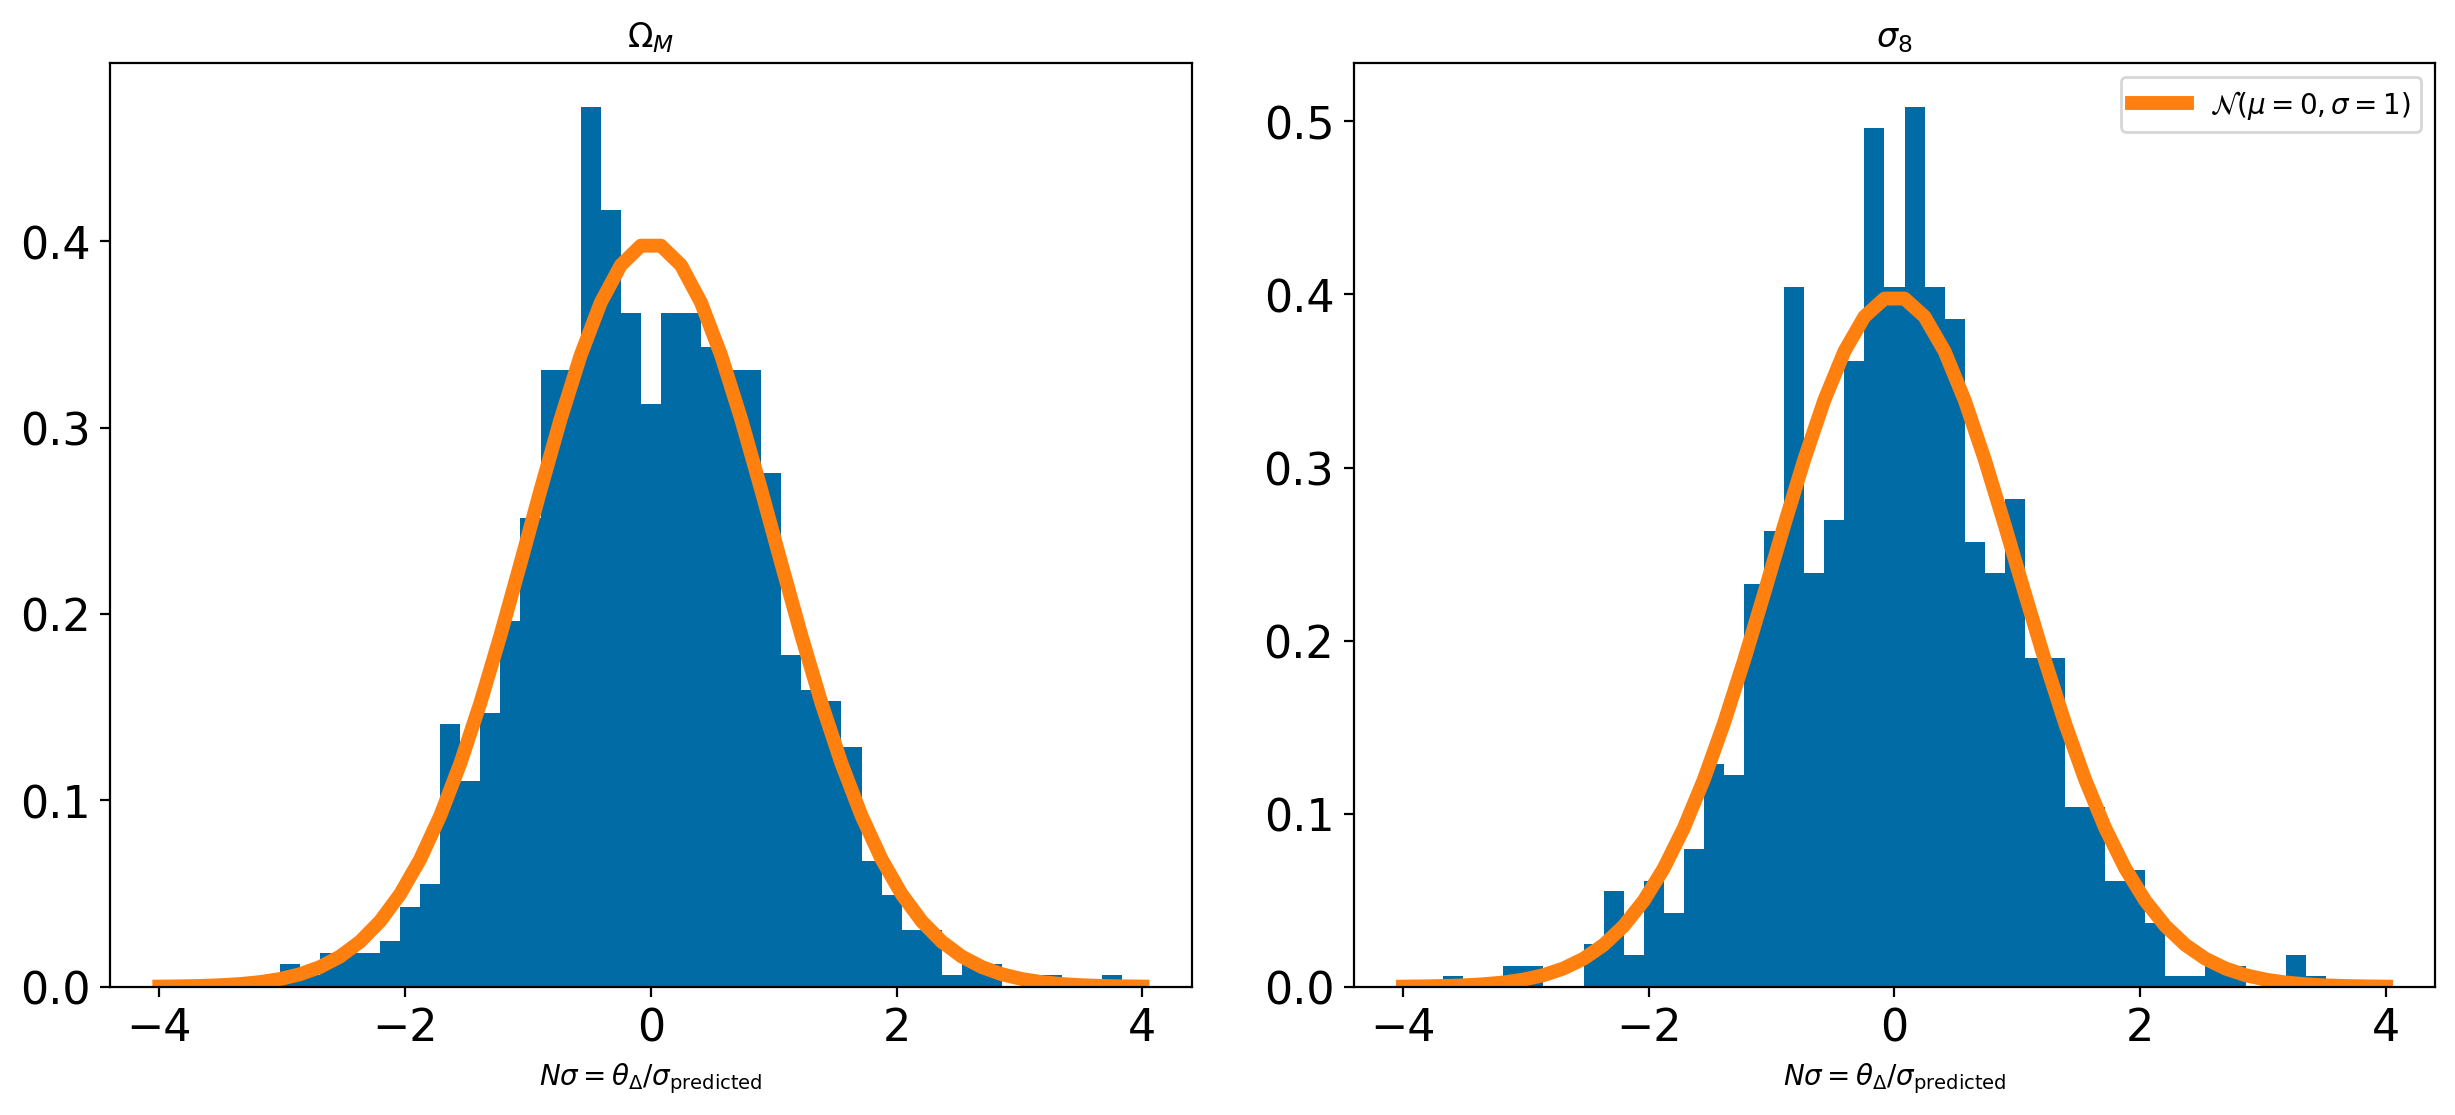

In [73]:
plt.figure(figsize = (15,6))
grid = gridspec.GridSpec(1,2)
grid.update(wspace = 0.15)
for i in range(len(theta_delta.T)):
    grid0 = plt.subplot(grid[i])
    grid0.hist(theta_delta.T[i]/theta_std.T[i], histtype = 'bar', bins = bins, density = True)
    grid0.set_title(label[i])
    grid0.plot(bins, normal, label = '$\mathcal{N}(\mu=0, \sigma=1)$', linewidth = 5)
    grid0.set_xlabel(r'$N\sigma = \theta_\Delta/\sigma_\mathrm{predicted}$')
grid0.legend()
plt.show()

Questions:
- noiseless Pk vs Pk? $\color{green}{\checkmark}$
- noiseless sigma? $\color{green}{\checkmark}$
- were emulated Pk generated with one set of params? or each generated with a sightly different one? eg am I meant to obtain just one value for theta or 10000 values for theta? --> I think I get it, Pk were emulated with theta sampled from posterior. so in the end we want to find the true set of theta? I have access to the sampled theta right? $\color{green}{\checkmark}$
- irl we would run sbi inference on real data (or simulated data that is different from training set), but rn I am just doing it on the same training/emulated data as an exercise? aka x_o = x? $\color{green}{\checkmark}$
- amortization: posterior that can be applied to many different observations without retraining vs sequential methods focus the inference on one particular observation to be more simulation-efficient... not sure I understand the significance, when would you need to retrain? --> so it's just when you train only on a small part of parameter space, instead of the whole range of priors. sequential methods may be more accurate, but amortized is fine for now $\color{green}{\checkmark}$
- don't i need priors to train inference model? $\color{green}{\checkmark}$
- will we assess the predictive performance of the posterior?
- do i train on noiseless or noisy Pk?
- mean vs map?
- so for my project: i am doing literally opposite approaches right? one is sbi, skipping over likelihood, and other is trying to work out the likelihood for 6x2 point? $\color{green}{\checkmark}$
- is the only way to approximate the likelihood with a gaussian? and the only way to get covariance from a bunch of simulations?
